In [2]:
# Importing all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus

# Data Preparation

In [3]:
# Added my own column names for better readability and making sense of the graphs
data = pd.read_csv('iBeacon_RSSI_Labeled.csv', skiprows=1 ,sep = ',', decimal = '.', error_bad_lines=False, names = ['location', 'date', 'beacon1', 'beacon2', 'beacon3', 'beacon4', 'beacon5', 'beacon6', 'beacon7', 'beacon8', 'beacon9', 'beacon10', 'beacon11', 'beacon12', 'beacon13'])

In [4]:
# Display all the rows in the dataset, disable this if you don't want to see all the lines
#pd.set_option('display.max_rows', None)

In [5]:
data

location                 date  beacon1  beacon2  beacon3  beacon4  \
0         O02  10-18-2016 11:15:21     -200     -200     -200     -200   
1         P01  10-18-2016 11:15:19     -200     -200     -200     -200   
2         P01  10-18-2016 11:15:17     -200     -200     -200     -200   
3         P01  10-18-2016 11:15:15     -200     -200     -200     -200   
4         P01  10-18-2016 11:15:13     -200     -200     -200     -200   
...       ...                  ...      ...      ...      ...      ...   
1415      I01    4-19-2016 9:37:46     -200      -76     -200     -200   
1416      I01    4-19-2016 9:37:39     -200      -72     -200     -200   
1417      I01    4-19-2016 9:37:36     -200      -67     -200     -200   
1418      I01    4-19-2016 9:37:26     -200      -79     -200     -200   
1419      I01    4-19-2016 9:37:23     -200      -75     -200     -200   

      beacon5  beacon6  beacon7  beacon8  beacon9  beacon10  beacon11  \
0        -200      -78     -200     -200     -200      -200      -200   
1        -200      -78     -200     -200     -200      -200      -200   
2        -200      -77     -200     -200     -200      -200      -200   
3        -200      -77     -200     -200     -200      -200      -200   
4        -200      -77     -200     -200     -200      -200      -200   
...       ...      ...      ...      ...      ...       ...       ...   
1415     -200     -200     -200     -200     -200      -200      -200   
1416     -200     -200     -200     -200     -200      -200      -200   
1417     -200     -200     -200     -200     -200      -200      -200   
1418     -200     -200     -200     -200     -200      -200      -200   
1419     -200     -200     -200     -200     -200      -200      -200   

      beacon12  beacon13  
0         -200      -200  
1         -200      -200  
2         -200      -200  
3         -200      -200  
4         -200      -200  
...        ...       ...  
1415      -200      -200  
1416      -200      -200  
1417      -200      -200  
1418      -200      -200  
1419      -200      -200  

[1420 rows x 15 columns]

In [6]:
# Checking the datatypes of all the columns 
data.dtypes

location    object
date        object
beacon1      int64
beacon2      int64
beacon3      int64
beacon4      int64
beacon5      int64
beacon6      int64
beacon7      int64
beacon8      int64
beacon9      int64
beacon10     int64
beacon11     int64
beacon12     int64
beacon13     int64
dtype: object

First, we want to normalize the beacon values across all the beacon columns to be between 0 and 100

We already know the min value, which is -200

We need to find the max value across all the beacon columns

In [7]:
# First we take a subset of the dataset, with only the beacon data
only_beacon_data = data[['beacon1', 'beacon2','beacon3','beacon4','beacon5','beacon6','beacon7','beacon8','beacon9','beacon10','beacon11','beacon12','beacon13']]

In [8]:
# Confirming the minimum value
only_beacon_data.values.min()

-200

In [9]:
# This is our max val which we can no use to normalize the rest of the beacon values (0 = -200, 100 = -55)
only_beacon_data.values.max()

-55

In [10]:
# Using the normalization function on all the beacon values
(only_beacon_data-only_beacon_data.values.min())/(only_beacon_data.values.max()-only_beacon_data.values.min())*100

beacon1    beacon2  beacon3  beacon4  beacon5    beacon6  beacon7  \
0         0.0   0.000000      0.0      0.0      0.0  84.137931      0.0   
1         0.0   0.000000      0.0      0.0      0.0  84.137931      0.0   
2         0.0   0.000000      0.0      0.0      0.0  84.827586      0.0   
3         0.0   0.000000      0.0      0.0      0.0  84.827586      0.0   
4         0.0   0.000000      0.0      0.0      0.0  84.827586      0.0   
...       ...        ...      ...      ...      ...        ...      ...   
1415      0.0  85.517241      0.0      0.0      0.0   0.000000      0.0   
1416      0.0  88.275862      0.0      0.0      0.0   0.000000      0.0   
1417      0.0  91.724138      0.0      0.0      0.0   0.000000      0.0   
1418      0.0  83.448276      0.0      0.0      0.0   0.000000      0.0   
1419      0.0  86.206897      0.0      0.0      0.0   0.000000      0.0   

      beacon8  beacon9  beacon10  beacon11  beacon12  beacon13  
0         0.0      0.0       0.0       0.0       0.0       0.0  
1         0.0      0.0       0.0       0.0       0.0       0.0  
2         0.0      0.0       0.0       0.0       0.0       0.0  
3         0.0      0.0       0.0       0.0       0.0       0.0  
4         0.0      0.0       0.0       0.0       0.0       0.0  
...       ...      ...       ...       ...       ...       ...  
1415      0.0      0.0       0.0       0.0       0.0       0.0  
1416      0.0      0.0       0.0       0.0       0.0       0.0  
1417      0.0      0.0       0.0       0.0       0.0       0.0  
1418      0.0      0.0       0.0       0.0       0.0       0.0  
1419      0.0      0.0       0.0       0.0       0.0       0.0  

[1420 rows x 13 columns]

In [11]:
# Now we equate the normalized values back into the main dataset
data[['beacon1', 'beacon2','beacon3','beacon4','beacon5','beacon6','beacon7','beacon8','beacon9','beacon10','beacon11','beacon12','beacon13']] = (only_beacon_data-only_beacon_data.values.min())/(only_beacon_data.values.max()-only_beacon_data.values.min())*100

In [12]:
data

location                 date  beacon1    beacon2  beacon3  beacon4  \
0         O02  10-18-2016 11:15:21      0.0   0.000000      0.0      0.0   
1         P01  10-18-2016 11:15:19      0.0   0.000000      0.0      0.0   
2         P01  10-18-2016 11:15:17      0.0   0.000000      0.0      0.0   
3         P01  10-18-2016 11:15:15      0.0   0.000000      0.0      0.0   
4         P01  10-18-2016 11:15:13      0.0   0.000000      0.0      0.0   
...       ...                  ...      ...        ...      ...      ...   
1415      I01    4-19-2016 9:37:46      0.0  85.517241      0.0      0.0   
1416      I01    4-19-2016 9:37:39      0.0  88.275862      0.0      0.0   
1417      I01    4-19-2016 9:37:36      0.0  91.724138      0.0      0.0   
1418      I01    4-19-2016 9:37:26      0.0  83.448276      0.0      0.0   
1419      I01    4-19-2016 9:37:23      0.0  86.206897      0.0      0.0   

      beacon5    beacon6  beacon7  beacon8  beacon9  beacon10  beacon11  \
0         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
1         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
2         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
3         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
4         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
...       ...        ...      ...      ...      ...       ...       ...   
1415      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1416      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1417      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1418      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1419      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   

      beacon12  beacon13  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  
...        ...       ...  
1415       0.0       0.0  
1416       0.0       0.0  
1417       0.0       0.0  
1418       0.0       0.0  
1419       0.0       0.0  

[1420 rows x 15 columns]

Now we will check if the location values are valid, i.e, they are within the alphabetical range of A-Z and numerical range of 1-15

In [13]:
for location in data['location']:
    print(location[0] + " : " + str(location[0].isalpha()))
    print(location[1:] + ": " + str(int(location[1:]) in range(1,16)))
    

O : True
02: True
P : True
01: True
P : True
01: True
P : True
01: True
P : True
01: True
P : True
01: True
P : True
01: True
P : True
02: True
R : True
01: True
R : True
01: True
R : True
01: True
R : True
01: True
R : True
01: True
R : True
02: True
R : True
02: True
R : True
02: True
R : True
02: True
R : True
02: True
R : True
02: True
R : True
02: True
R : True
02: True
R : True
02: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
01: True
S : True
02: True
S : True
02: True
S : True
02: True
S : True
02: True
S : True
02: True
S : True
02: True
S : True
02: True
T : True
01: True
T : True
01: True
U : True
02: True
U : True
01: True
U : True
01: True
U : True
01: True
U : True
01: True
U : True
02: True
J : True
03: True
J : True
03: True
J : True
03: True
J : True
03: True
J : True
03: True
K : True
03: True
K : True
03: True
K : True
03: True
K : True
0

Q : True
03: True
Q : True
03: True
Q : True
03: True
Q : True
03: True
Q : True
03: True
Q : True
03: True
Q : True
03: True
Q : True
03: True
Q : True
03: True
P : True
03: True
P : True
03: True
P : True
03: True
P : True
03: True
P : True
03: True
P : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
O : True
03: True
N : True
03: True
N : True
03: True
N : True
03: True
N : True
03: True
N : True
03: True
N : True
03: True
N : True
03: True
N : True
03: True
M : True
03: True
M : True
03: True
M : True
03: True
M : True
03: True
M : True
03: True
M : True
03: True
L : True
03: True
L : True
03: True
L : True
03: True
L : True
03: True
L : True
03: True
L : True
03: True
K : True
03: True
K : True
03: True
K : True
03: True
K : True
03: True
K : True
03: True
K : True
03: True
K : True
03: True
K : True
03: True
J : True
03: True
J : True
03: True
J : True
0

Now we will split the date column into 2 new columns, one for just the data and one for the time (this might be useful later)

In [14]:
data[['date_day','date_time']] = data.date.str.split(expand=True) 

In [15]:
data

location                 date  beacon1    beacon2  beacon3  beacon4  \
0         O02  10-18-2016 11:15:21      0.0   0.000000      0.0      0.0   
1         P01  10-18-2016 11:15:19      0.0   0.000000      0.0      0.0   
2         P01  10-18-2016 11:15:17      0.0   0.000000      0.0      0.0   
3         P01  10-18-2016 11:15:15      0.0   0.000000      0.0      0.0   
4         P01  10-18-2016 11:15:13      0.0   0.000000      0.0      0.0   
...       ...                  ...      ...        ...      ...      ...   
1415      I01    4-19-2016 9:37:46      0.0  85.517241      0.0      0.0   
1416      I01    4-19-2016 9:37:39      0.0  88.275862      0.0      0.0   
1417      I01    4-19-2016 9:37:36      0.0  91.724138      0.0      0.0   
1418      I01    4-19-2016 9:37:26      0.0  83.448276      0.0      0.0   
1419      I01    4-19-2016 9:37:23      0.0  86.206897      0.0      0.0   

      beacon5    beacon6  beacon7  beacon8  beacon9  beacon10  beacon11  \
0         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
1         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
2         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
3         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
4         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
...       ...        ...      ...      ...      ...       ...       ...   
1415      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1416      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1417      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1418      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1419      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   

      beacon12  beacon13    date_day date_time  
0          0.0       0.0  10-18-2016  11:15:21  
1          0.0       0.0  10-18-2016  11:15:19  
2          0.0       0.0  10-18-2016  11:15:17  
3          0.0       0.0  10-18-2016  11:15:15  
4          0.0       0.0  10-18-2016  11:15:13  
...        ...       ...         ...       ...  
1415       0.0       0.0   4-19-2016   9:37:46  
1416       0.0       0.0   4-19-2016   9:37:39  
1417       0.0       0.0   4-19-2016   9:37:36  
1418       0.0       0.0   4-19-2016   9:37:26  
1419       0.0       0.0   4-19-2016   9:37:23  

[1420 rows x 17 columns]

In [16]:
# Checking to see if it split properly
data['date_day'].value_counts()

10-18-2016    600
4-20-2016     304
5-25-2016     161
9-21-2016      74
7-21-2016      63
10-3-2016      51
9-19-2016      51
10-4-2016      37
4-19-2016      30
8-4-2016       27
9-27-2016      22
Name: date_day, dtype: int64

In [17]:
data['date_time'].value_counts()

11:58:03    2
10:58:22    2
10:51:46    2
10:28:21    2
10:26:01    2
           ..
10:21:58    1
11:03:47    1
10:55:36    1
10:20:14    1
10:21:57    1
Name: date_time, Length: 1381, dtype: int64

Now we will split the location column into 2 new columns, one for the the alphabet and one for the number corresponding to the location (this might be useful later)

In [18]:
data['location_alphabet'] = data['location'].str[0]
data['location_number'] = data['location'].str[1:]

In [19]:
data['location_alphabet'].value_counts()

I    202
J    192
K    142
S    136
L    100
R     91
N     86
O     86
M     85
Q     74
P     71
U     55
T     39
D     24
W     17
V      8
G      4
F      4
E      4
Name: location_alphabet, dtype: int64

In [20]:
data['location_number'].value_counts()

04    238
05    213
03    200
06    187
02    155
01    138
15    116
07     75
08     58
10     20
09     10
13      6
14      4
Name: location_number, dtype: int64

In [21]:
data

location                 date  beacon1    beacon2  beacon3  beacon4  \
0         O02  10-18-2016 11:15:21      0.0   0.000000      0.0      0.0   
1         P01  10-18-2016 11:15:19      0.0   0.000000      0.0      0.0   
2         P01  10-18-2016 11:15:17      0.0   0.000000      0.0      0.0   
3         P01  10-18-2016 11:15:15      0.0   0.000000      0.0      0.0   
4         P01  10-18-2016 11:15:13      0.0   0.000000      0.0      0.0   
...       ...                  ...      ...        ...      ...      ...   
1415      I01    4-19-2016 9:37:46      0.0  85.517241      0.0      0.0   
1416      I01    4-19-2016 9:37:39      0.0  88.275862      0.0      0.0   
1417      I01    4-19-2016 9:37:36      0.0  91.724138      0.0      0.0   
1418      I01    4-19-2016 9:37:26      0.0  83.448276      0.0      0.0   
1419      I01    4-19-2016 9:37:23      0.0  86.206897      0.0      0.0   

      beacon5    beacon6  beacon7  beacon8  beacon9  beacon10  beacon11  \
0         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
1         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
2         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
3         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
4         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
...       ...        ...      ...      ...      ...       ...       ...   
1415      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1416      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1417      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1418      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1419      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   

      beacon12  beacon13    date_day date_time location_alphabet  \
0          0.0       0.0  10-18-2016  11:15:21                 O   
1          0.0       0.0  10-18-2016  11:15:19                 P   
2          0.0       0.0  10-18-2016  11:15:17                 P   
3          0.0       0.0  10-18-2016  11:15:15                 P   
4          0.0       0.0  10-18-2016  11:15:13                 P   
...        ...       ...         ...       ...               ...   
1415       0.0       0.0   4-19-2016   9:37:46                 I   
1416       0.0       0.0   4-19-2016   9:37:39                 I   
1417       0.0       0.0   4-19-2016   9:37:36                 I   
1418       0.0       0.0   4-19-2016   9:37:26                 I   
1419       0.0       0.0   4-19-2016   9:37:23                 I   

     location_number  
0                 02  
1                 01  
2                 01  
3                 01  
4                 01  
...              ...  
1415              01  
1416              01  
1417              01  
1418              01  
1419              01  

[1420 rows x 19 columns]

In [22]:
# Rechecking the datatypes of the columns
data.dtypes

location              object
date                  object
beacon1              float64
beacon2              float64
beacon3              float64
beacon4              float64
beacon5              float64
beacon6              float64
beacon7              float64
beacon8              float64
beacon9              float64
beacon10             float64
beacon11             float64
beacon12             float64
beacon13             float64
date_day              object
date_time             object
location_alphabet     object
location_number       object
dtype: object

# Exploration of each column

For this task, we want to explore each column. Seeing that the majority of the feature columns are beacons, we can check what the value counts are

In [23]:
# For example, for beacon2, these are the occurences of different values
data['beacon2'].value_counts()

0.000000     923
82.758621     34
84.137931     34
84.827586     32
85.517241     31
86.206897     31
86.896552     29
82.068966     28
83.448276     27
88.275862     27
87.586207     25
92.413793     25
93.103448     23
89.655172     19
91.724138     18
88.965517     17
91.034483     16
90.344828     15
93.793103     14
94.482759     12
1.379310      11
95.172414      6
81.379310      5
80.689655      3
96.551724      3
80.000000      3
79.310345      2
95.862069      2
97.241379      2
78.620690      2
77.931034      1
Name: beacon2, dtype: int64

In [24]:
# However, for the purpose of assessing the signal strength and frequency of this beacon, we can ignore the rows where 
# this beacon does not have a reading, i.e, is equal to zero 
data['beacon2'][data['beacon2']!=0].value_counts()

82.758621    34
84.137931    34
84.827586    32
85.517241    31
86.206897    31
86.896552    29
82.068966    28
88.275862    27
83.448276    27
87.586207    25
92.413793    25
93.103448    23
89.655172    19
91.724138    18
88.965517    17
91.034483    16
90.344828    15
93.793103    14
94.482759    12
1.379310     11
95.172414     6
81.379310     5
80.689655     3
80.000000     3
96.551724     3
78.620690     2
79.310345     2
97.241379     2
95.862069     2
77.931034     1
Name: beacon2, dtype: int64

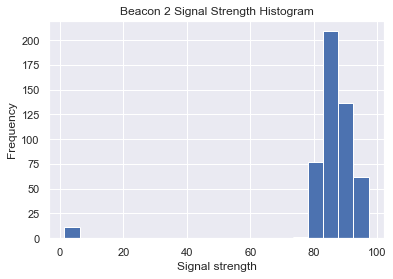

In [25]:
data['beacon2'][data['beacon2']!=0].plot(kind = 'hist', bins=20)
plt.title("Beacon 2 Signal Strength Histogram")
plt.xlabel('Signal strength')
plt.show()

Now we can apply this same idea to all the other beacons in a loop

Beacon1 Signal Strength Histogram
Mean = 85.19
Total number of non-zero signal readings = 25


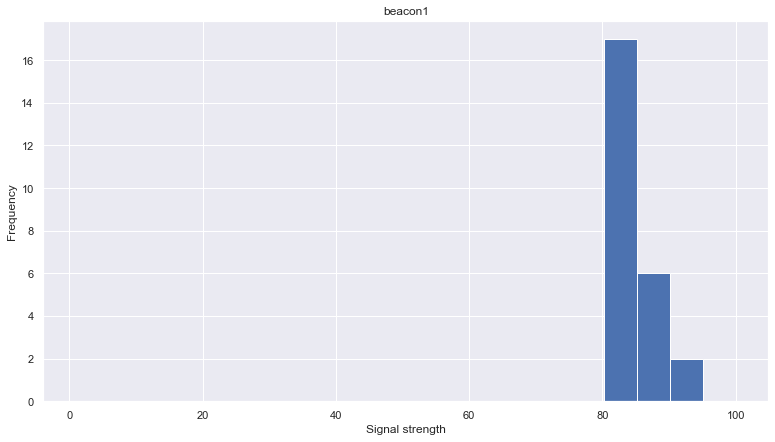

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon2 Signal Strength Histogram
Mean = 85.47
Total number of non-zero signal readings = 497


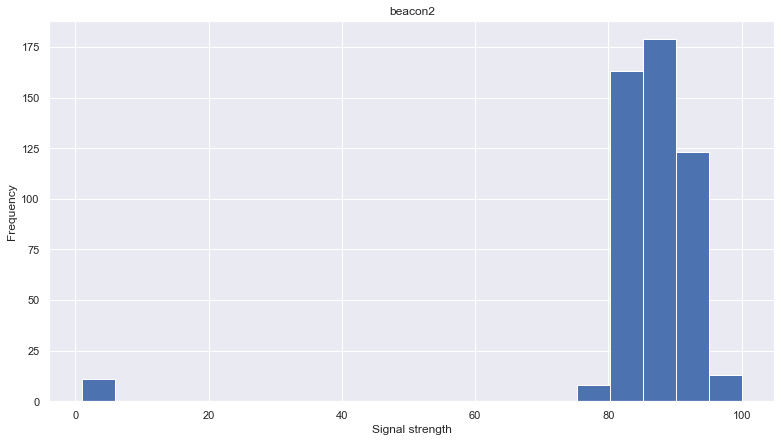

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon3 Signal Strength Histogram
Mean = 85.57
Total number of non-zero signal readings = 280


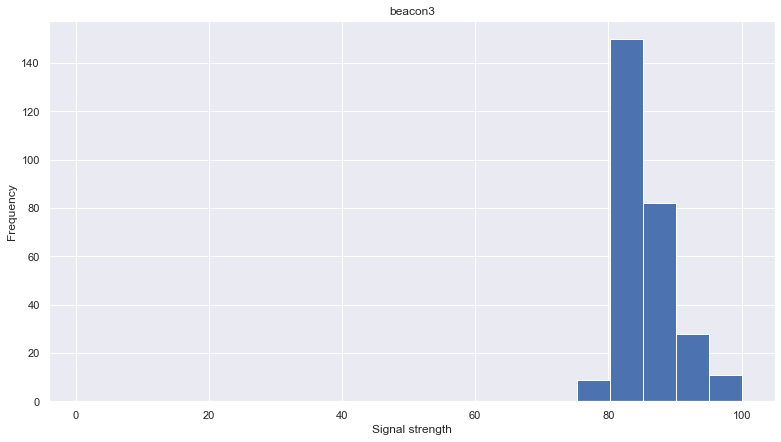

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon4 Signal Strength Histogram
Mean = 86.4
Total number of non-zero signal readings = 402


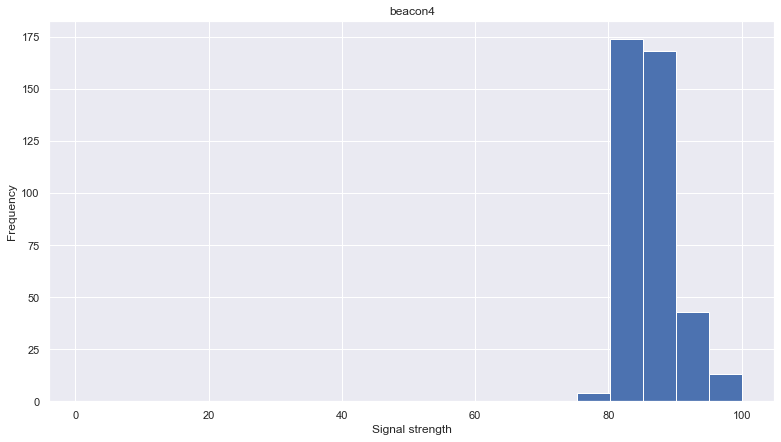

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon5 Signal Strength Histogram
Mean = 85.73
Total number of non-zero signal readings = 247


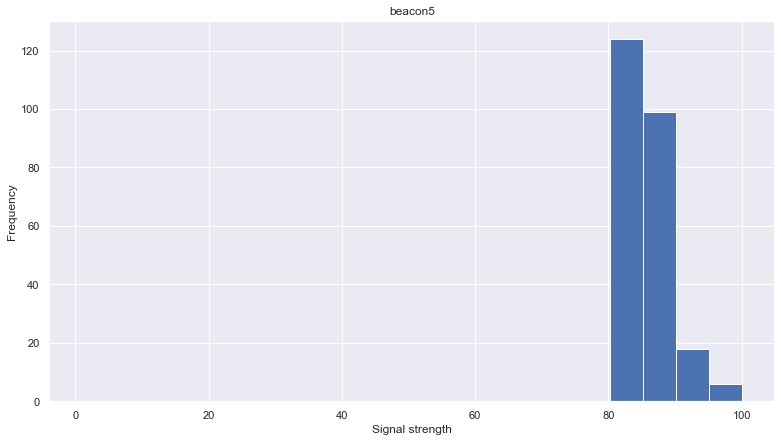

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon6 Signal Strength Histogram
Mean = 85.09
Total number of non-zero signal readings = 287


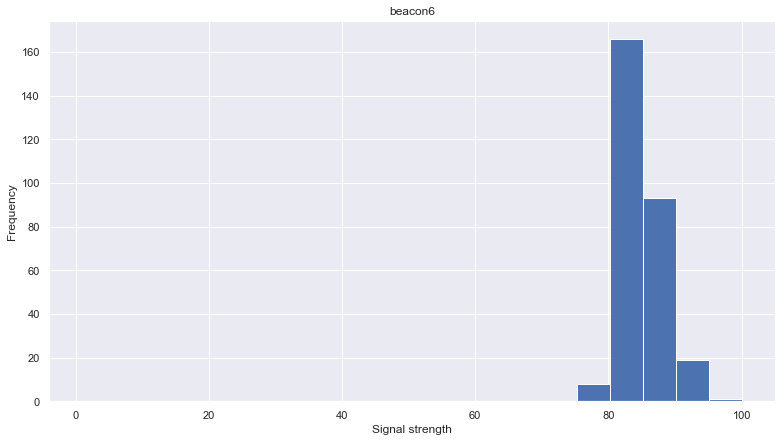

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon7 Signal Strength Histogram
Mean = 85.45
Total number of non-zero signal readings = 50


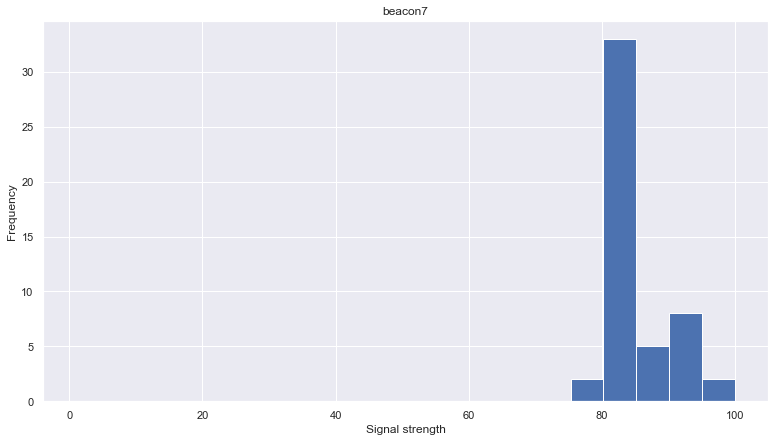

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon8 Signal Strength Histogram
Mean = 86.41
Total number of non-zero signal readings = 91


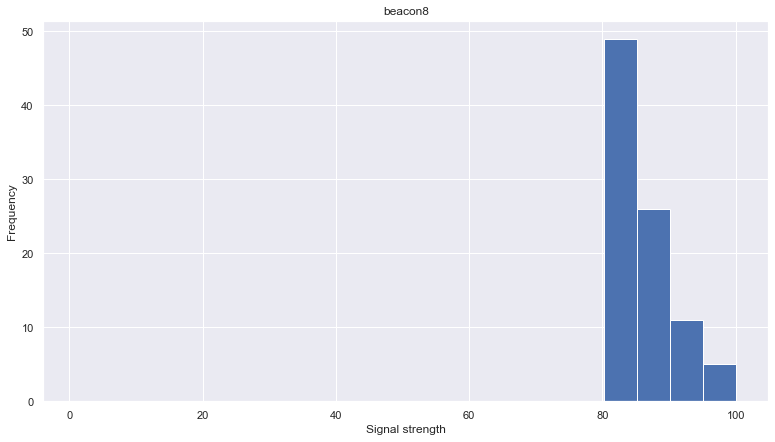

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon9 Signal Strength Histogram
Mean = 90.19
Total number of non-zero signal readings = 31


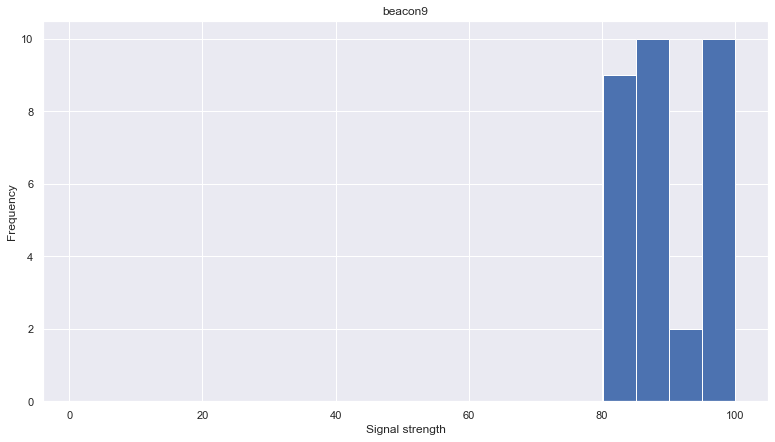

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon10 Signal Strength Histogram
Mean = 86.37
Total number of non-zero signal readings = 29


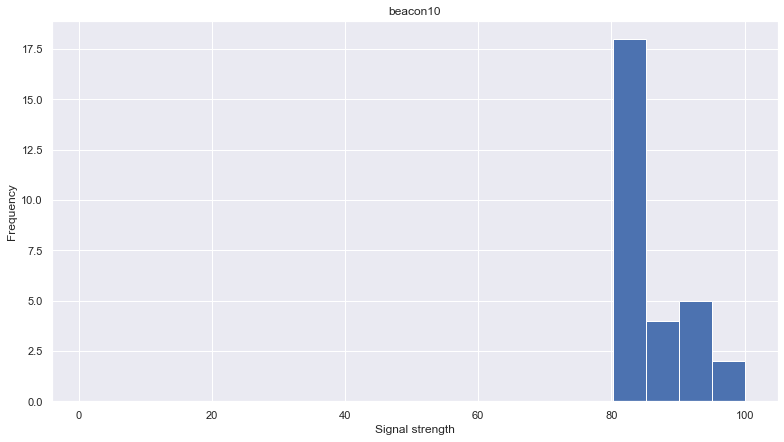

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon11 Signal Strength Histogram
Mean = 88.19
Total number of non-zero signal readings = 25


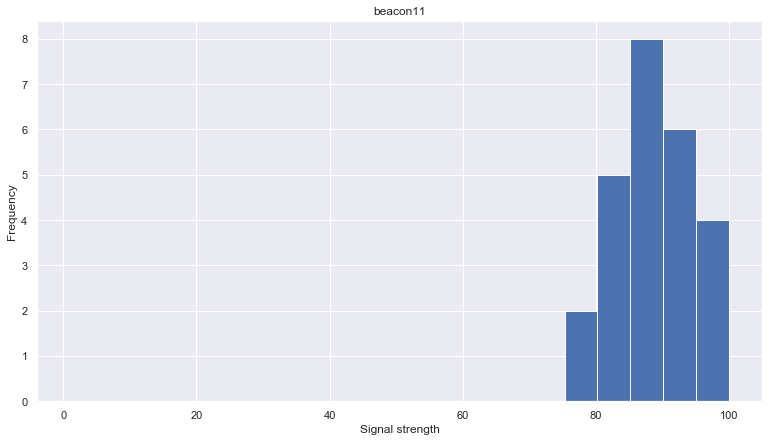

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon12 Signal Strength Histogram
Mean = 77.4
Total number of non-zero signal readings = 35


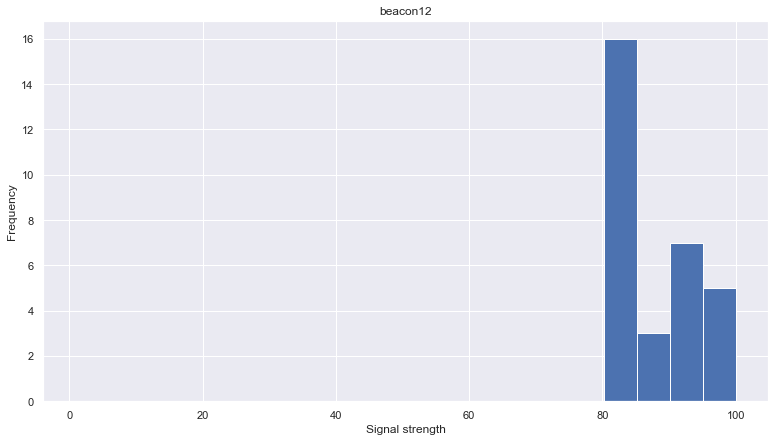

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Beacon13 Signal Strength Histogram
Mean = 87.57
Total number of non-zero signal readings = 44


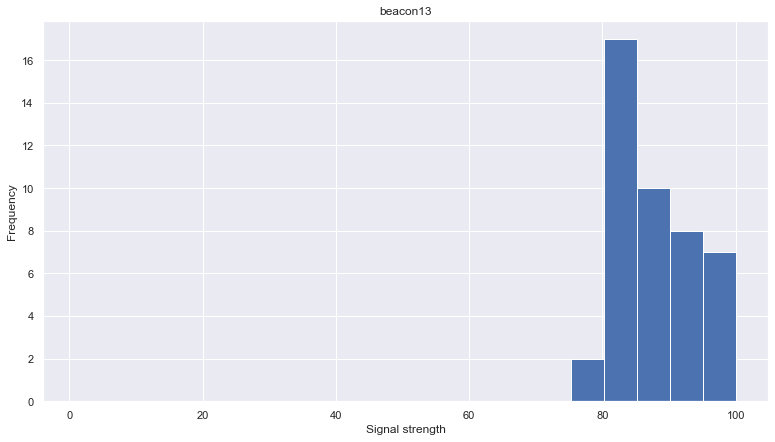

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [26]:
# We create empty lists for the bubble chart that we will create from all readings later
bubble_y = []
bubble_z = []

#Measuring the average strength of each beacon
for i in range(1,14):
    
    # beacon corresponds to the current beacon column, for example when i=5, beacon = 'beacon5'
    beacon = 'beacon' + str(i)
    
    beacon_mean = data[beacon][data[beacon]!=0].mean()
    
    # add this mean value to the y-axis values for the bubble chart
    bubble_y.append(beacon_mean)
    
    print("=============================================================================================================")
    print("Beacon" + str(i) + " Signal Strength Histogram")
    print("=============================================================================================================")
    
    print("Mean = "+ str(round(beacon_mean, 2)))
    print("Total number of non-zero signal readings = "+str(len(data[beacon][data[beacon]!=0])))
    
    # add the frequency to the z-values for the bubble chart, multiply it by 10 for better visualization
    bubble_z.append( len(data[beacon][data[beacon]!=0]) * 10 )
    plt.figure(figsize = (13,7))
    data[beacon][data[beacon]!=0].hist(bins = 20, range=[1, 100])
    plt.title(beacon)
    
    plt.ylabel('Frequency')
    plt.xlabel('Signal strength')
    plt.show()
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

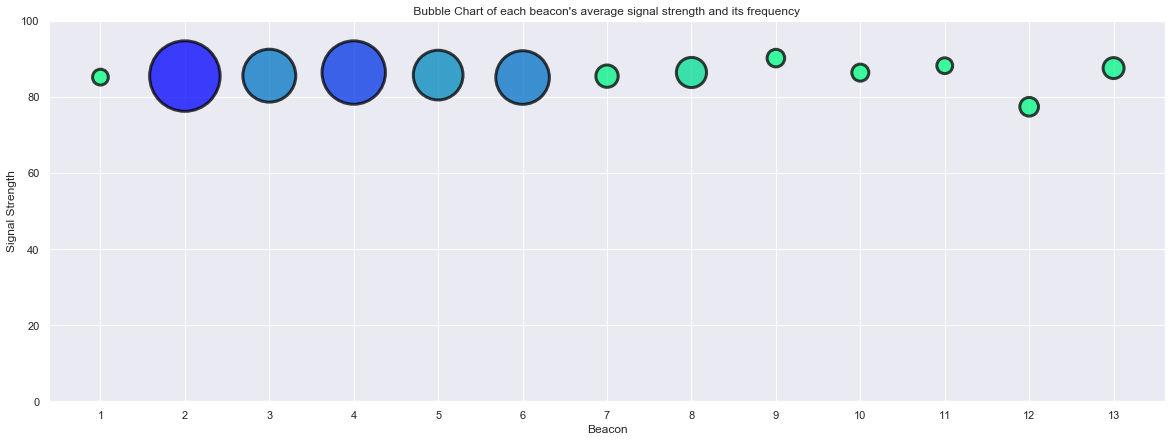

In [27]:
import matplotlib.pyplot as plt
import numpy as np
 
# create beacon x-range data
bubble_x = range(1,14)


# use the scatter function
plt.figure(figsize=(20, 7))
plt.scatter(bubble_x, bubble_y, s=bubble_z, alpha=0.75, c = bubble_z, cmap = 'winter_r', edgecolors = "black", linewidth=3)
plt.ylim((0,100))
plt.xticks(bubble_x)
plt.xlabel('Beacon')
plt.ylabel('Signal Strength')
plt.title(" Bubble Chart of each beacon's average signal strength and its frequency ")
plt.show()


Now we will explore the location column

In [28]:
# Create a datafram with the location column values and it's corresponding occurence counts in a separate column
location_value_counts = data['location'].value_counts().rename_axis('location').reset_index(name='counts')

In [29]:
location_value_counts['location_alphabet'] = location_value_counts['location'].str[0]
location_value_counts['location_number'] = location_value_counts['location'].str[1:]

In [30]:
location_value_counts

location  counts location_alphabet location_number
0        K04      34                 K              04
1        J04      32                 J              04
2        J06      29                 J              06
3        J07      27                 J              07
4        I06      27                 I              06
..       ...     ...               ...             ...
100      Q06       4                 Q              06
101      S15       3                 S              15
102      L08       3                 L              08
103      O01       2                 O              01
104      L09       2                 L              09

[105 rows x 4 columns]

In [31]:
# heatmap pivot table
heatmap1_data = pd.pivot_table(location_value_counts, values='counts', fill_value = 0,
                     index=['location_number'], 
                     columns='location_alphabet')

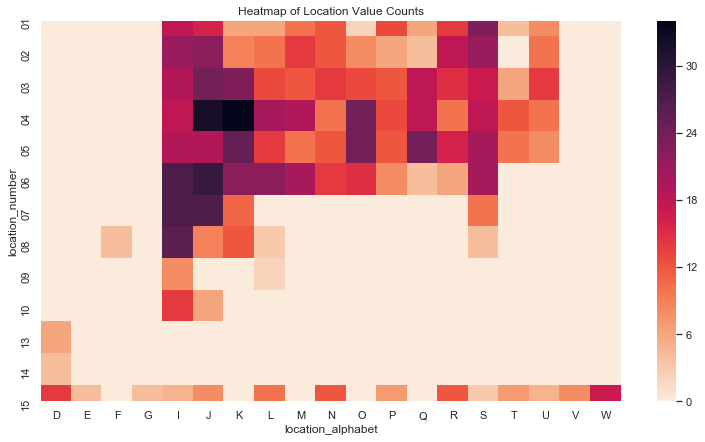

In [32]:
#heatmap_colors = ['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r','BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2','Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd','OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r','Paired','Paired_r','Pastel1','Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r','PuBu_r','PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r','RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Reds','Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r','Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd','YlOrRd_r','afmhot','afmhot_r','autumn','autumn_r','binary','binary_r','bone','bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool','cool_r','coolwarm','coolwarm_r','copper','copper_r','cubehelix','cubehelix_r','flag','flag_r','gist_earth','gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg','gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r','gray','gray_r','hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno','inferno_r','jet','jet_r','magma','magma_r','mako','mako_r','nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r','plasma','plasma_r','prism','prism_r','rainbow','rainbow_r','rocket','rocket_r','seismic','seismic_r','spring','spring_r','summer','summer_r','tab10','tab10_r','tab20','tab20_r','tab20b','tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight','twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']

plt.figure(figsize = (13, 7))

sns.heatmap(heatmap1_data, cmap='rocket_r')
plt.title("Heatmap of Location Value Counts")
plt.show()

In [33]:
# This heatmap shows us that our current data doesn't have enough data to equally cover each and every location

# Relationship between pairs of attributes 

In [34]:
data

location                 date  beacon1    beacon2  beacon3  beacon4  \
0         O02  10-18-2016 11:15:21      0.0   0.000000      0.0      0.0   
1         P01  10-18-2016 11:15:19      0.0   0.000000      0.0      0.0   
2         P01  10-18-2016 11:15:17      0.0   0.000000      0.0      0.0   
3         P01  10-18-2016 11:15:15      0.0   0.000000      0.0      0.0   
4         P01  10-18-2016 11:15:13      0.0   0.000000      0.0      0.0   
...       ...                  ...      ...        ...      ...      ...   
1415      I01    4-19-2016 9:37:46      0.0  85.517241      0.0      0.0   
1416      I01    4-19-2016 9:37:39      0.0  88.275862      0.0      0.0   
1417      I01    4-19-2016 9:37:36      0.0  91.724138      0.0      0.0   
1418      I01    4-19-2016 9:37:26      0.0  83.448276      0.0      0.0   
1419      I01    4-19-2016 9:37:23      0.0  86.206897      0.0      0.0   

      beacon5    beacon6  beacon7  beacon8  beacon9  beacon10  beacon11  \
0         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
1         0.0  84.137931      0.0      0.0      0.0       0.0       0.0   
2         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
3         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
4         0.0  84.827586      0.0      0.0      0.0       0.0       0.0   
...       ...        ...      ...      ...      ...       ...       ...   
1415      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1416      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1417      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1418      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   
1419      0.0   0.000000      0.0      0.0      0.0       0.0       0.0   

      beacon12  beacon13    date_day date_time location_alphabet  \
0          0.0       0.0  10-18-2016  11:15:21                 O   
1          0.0       0.0  10-18-2016  11:15:19                 P   
2          0.0       0.0  10-18-2016  11:15:17                 P   
3          0.0       0.0  10-18-2016  11:15:15                 P   
4          0.0       0.0  10-18-2016  11:15:13                 P   
...        ...       ...         ...       ...               ...   
1415       0.0       0.0   4-19-2016   9:37:46                 I   
1416       0.0       0.0   4-19-2016   9:37:39                 I   
1417       0.0       0.0   4-19-2016   9:37:36                 I   
1418       0.0       0.0   4-19-2016   9:37:26                 I   
1419       0.0       0.0   4-19-2016   9:37:23                 I   

     location_number  
0                 02  
1                 01  
2                 01  
3                 01  
4                 01  
...              ...  
1415              01  
1416              01  
1417              01  
1418              01  
1419              01  

[1420 rows x 19 columns]

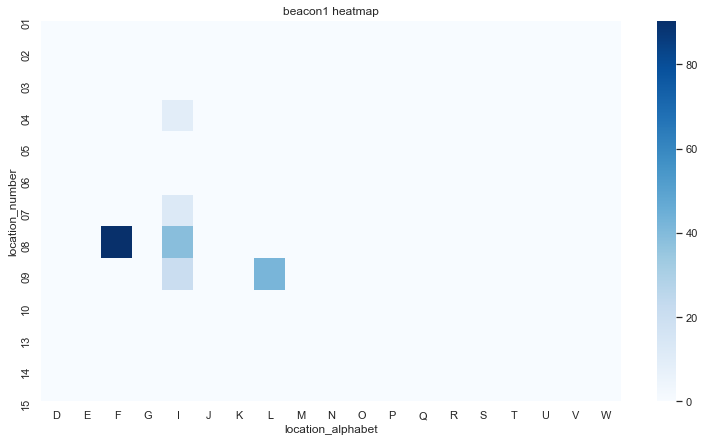

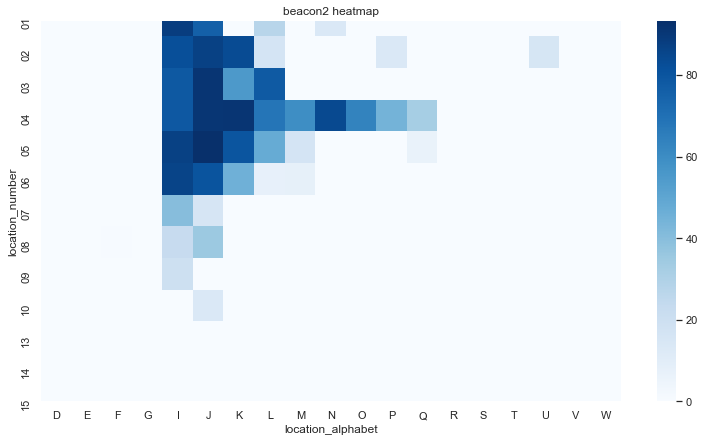

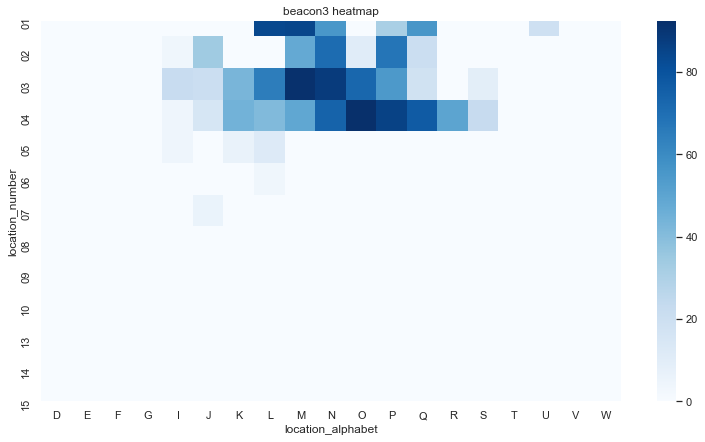

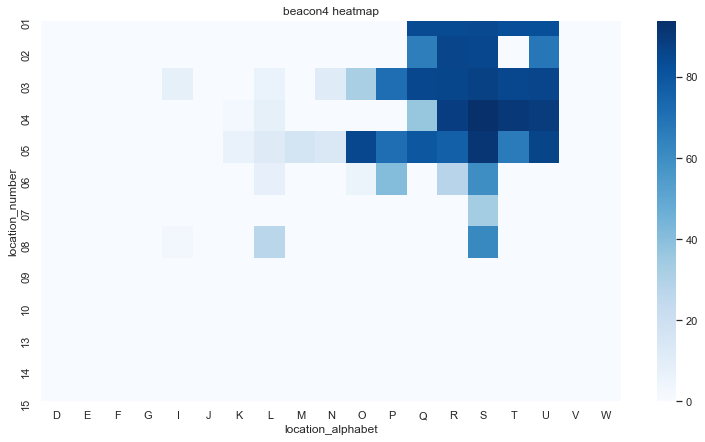

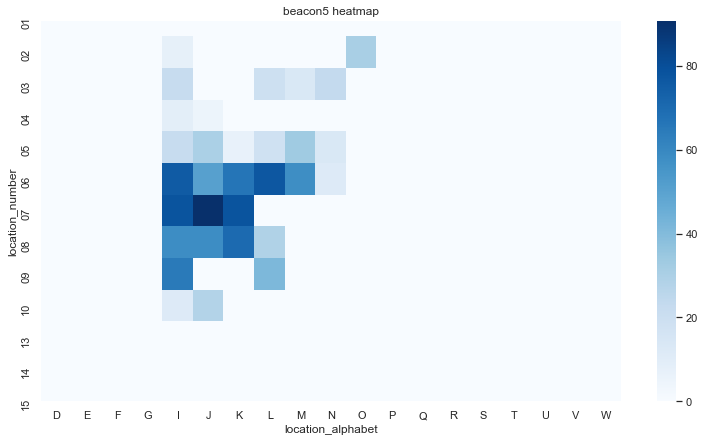

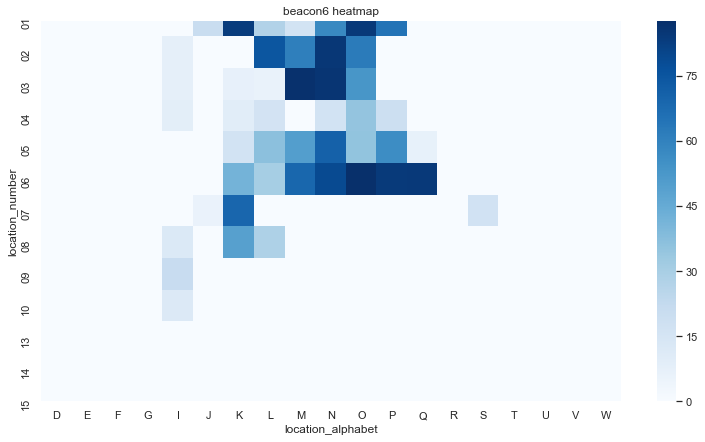

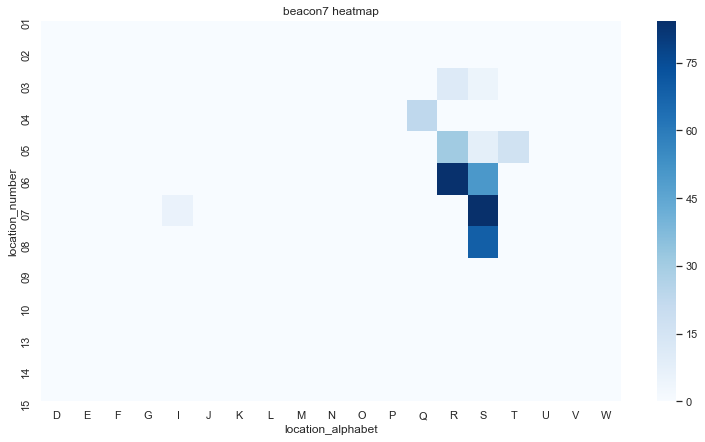

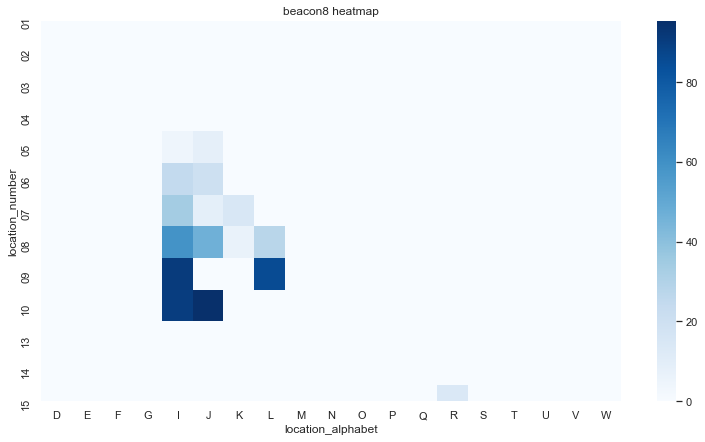

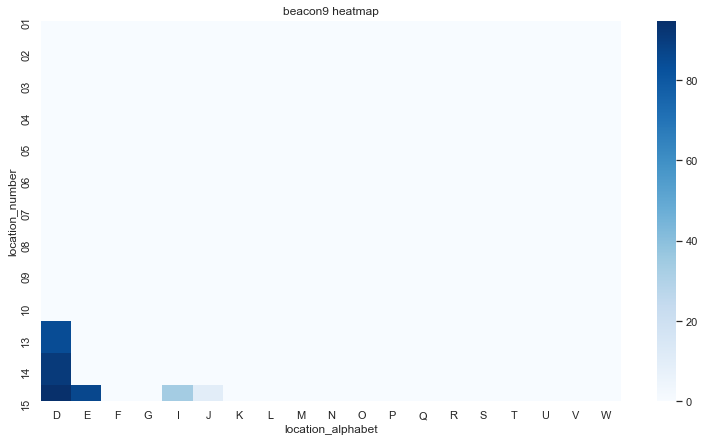

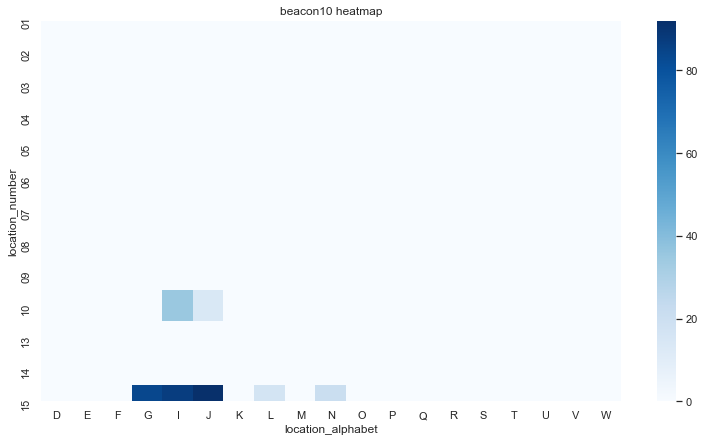

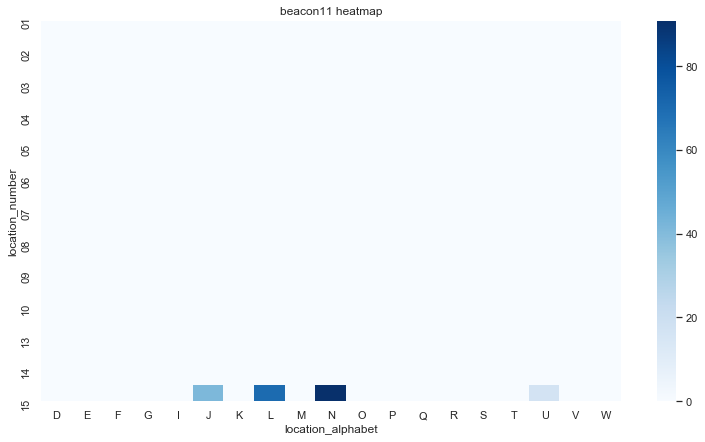

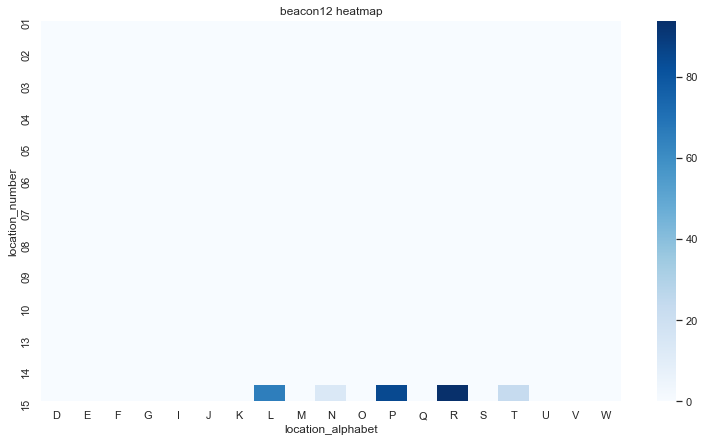

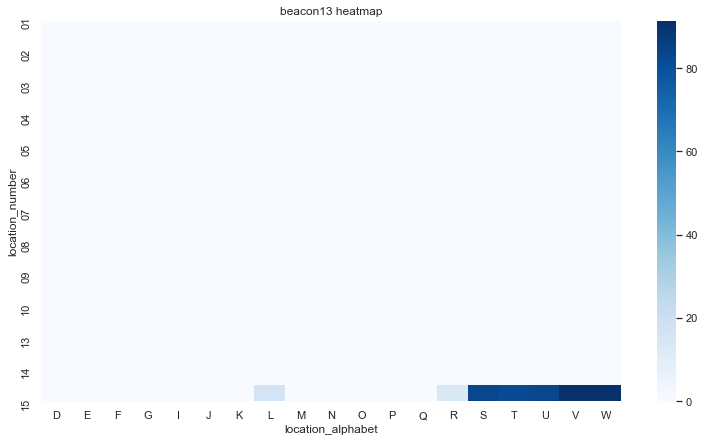

In [35]:
for i in range(1,14):
    beacon = 'beacon' + str(i)
    heatmap1_data = pd.pivot_table(data, values=beacon, 
                         index=['location_number'], 
                         columns='location_alphabet', fill_value = 0)
    plt.figure(figsize = (13, 7))
    sns.heatmap(heatmap1_data, cmap="Blues")
    plt.title(beacon + " heatmap")
    plt.show()

# Data Modelling

First, we will try classification with KNN

In [36]:
# The feature columns in this case are all the beacons, and we need all because we are classifying location 
# by the relative distance (signal strength) of each beacon to each other beacon
X_data = data[['beacon1', 'beacon2','beacon3','beacon4','beacon5','beacon6','beacon7','beacon8','beacon9','beacon10','beacon11','beacon12','beacon13']]

In [37]:
X_data

beacon1    beacon2  beacon3  beacon4  beacon5    beacon6  beacon7  \
0         0.0   0.000000      0.0      0.0      0.0  84.137931      0.0   
1         0.0   0.000000      0.0      0.0      0.0  84.137931      0.0   
2         0.0   0.000000      0.0      0.0      0.0  84.827586      0.0   
3         0.0   0.000000      0.0      0.0      0.0  84.827586      0.0   
4         0.0   0.000000      0.0      0.0      0.0  84.827586      0.0   
...       ...        ...      ...      ...      ...        ...      ...   
1415      0.0  85.517241      0.0      0.0      0.0   0.000000      0.0   
1416      0.0  88.275862      0.0      0.0      0.0   0.000000      0.0   
1417      0.0  91.724138      0.0      0.0      0.0   0.000000      0.0   
1418      0.0  83.448276      0.0      0.0      0.0   0.000000      0.0   
1419      0.0  86.206897      0.0      0.0      0.0   0.000000      0.0   

      beacon8  beacon9  beacon10  beacon11  beacon12  beacon13  
0         0.0      0.0       0.0       0.0       0.0       0.0  
1         0.0      0.0       0.0       0.0       0.0       0.0  
2         0.0      0.0       0.0       0.0       0.0       0.0  
3         0.0      0.0       0.0       0.0       0.0       0.0  
4         0.0      0.0       0.0       0.0       0.0       0.0  
...       ...      ...       ...       ...       ...       ...  
1415      0.0      0.0       0.0       0.0       0.0       0.0  
1416      0.0      0.0       0.0       0.0       0.0       0.0  
1417      0.0      0.0       0.0       0.0       0.0       0.0  
1418      0.0      0.0       0.0       0.0       0.0       0.0  
1419      0.0      0.0       0.0       0.0       0.0       0.0  

[1420 rows x 13 columns]

In [38]:
# This is our target label column, the location
y_target = data['location']

In [39]:
y_target

0       O02
1       P01
2       P01
3       P01
4       P01
       ... 
1415    I01
1416    I01
1417    I01
1418    I01
1419    I01
Name: location, Length: 1420, dtype: object

In [40]:
# Since the dataset is relatively small for the number of labels and high number of features, we will try
# classifying with a train-test split of 90-10. We will optimize this later. 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.1, random_state = 0)

In [41]:
X_train

beacon1    beacon2    beacon3    beacon4    beacon5    beacon6  \
161       0.0  86.896552  88.275862   0.000000   0.000000   0.000000   
500       0.0   0.000000  84.137931   0.000000   0.000000  84.827586   
1262      0.0  84.827586  84.137931   0.000000   0.000000   0.000000   
1075      0.0  91.724138   0.000000   0.000000  81.379310   0.000000   
215       0.0  93.103448   0.000000   0.000000   0.000000   0.000000   
...       ...        ...        ...        ...        ...        ...   
763       0.0  91.034483   0.000000   0.000000   0.000000   0.000000   
835       0.0   0.000000   0.000000   0.000000  86.896552   0.000000   
1216      0.0   0.000000   0.000000  85.517241   0.000000   0.000000   
559       0.0  91.724138   0.000000   0.000000   0.000000   0.000000   
684       0.0   0.000000   0.000000   0.000000   0.000000   0.000000   

        beacon7  beacon8  beacon9  beacon10  beacon11  beacon12  beacon13  
161    0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
500    0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
1262   0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
1075   0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
215    0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
...         ...      ...      ...       ...       ...       ...       ...  
763    0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
835    0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
1216   0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
559    0.000000      0.0      0.0       0.0       0.0       0.0       0.0  
684   93.793103      0.0      0.0       0.0       0.0       0.0       0.0  

[1278 rows x 13 columns]

In [42]:
X_train.shape

(1278, 13)

In [43]:
X_test.shape

(142, 13)

In [44]:
y_train.shape

(1278,)

In [45]:
y_test.shape

(142,)

In [46]:
# The classifer, starting with a basic n_neighbours value of 3
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [47]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [48]:
predicted = knn_clf.predict(X_test)

In [49]:
predicted.shape

(142,)

In [50]:
cm = confusion_matrix(y_test, predicted)

In [51]:
# Since there are so many labels, it doesn't make sense to view it as a CM
print(cm)

[[0 0 0 ... 0 0 0]
 [1 2 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]


In [61]:
# Thus we will look at the classification report, and clearly, the results can be improved significantly
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       1.00      1.00      1.00         1
         D15       1.00      1.00      1.00         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         1
         I02       0.00      0.00      0.00         0
         I03       0.33      0.50      0.40         2
         I04       0.00      0.00      0.00         1
         I05       0.00      0.00      0.00         2
         I06       0.50      0.50      0.50         2
         I07       0.50      1.00      0.67         2
         I08       0.83      1.00      0.91         5
         I10       0.00      0.00      0.00         0
         J01       0.00      0.00      0.00         2
         J02       0.00      0.00      0.00         1
         J03       0.00      0.00      0.00         3
         J04       0.00      0.00      0.00         6
         J05       0.50    

In [53]:
# Accuracy of this classifier
metrics.accuracy_score(y_test, predicted)

0.2535211267605634

Now we will optimize the parameters for the KNN with the help of nested loops

In [54]:
# lists for each of the different parameter options, to be used for combinations
all_metrics = ['minkowski', 'manhattan']
weights = ['distance', 'uniform']
p_values = [1, 2, 3, 4, 5, 6]
k_values = range(1,30) 
random_states = range(0,20)
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]

Putting these lists in nested for loops, we can optimize the classifier with parameter combinations. 
Running this might take a while, so I've commented it out with the results in the cell below

In [55]:
'''max_accuracy = 0

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = test_size, random_state = random_state)
        for metric in all_metrics:
            for weight in weights:
                for p in p_values:
                    for k in k_values:
                        
                        knn_clf = KNeighborsClassifier(n_neighbors = k, p=p, weights = weight, metric=metric)
                        knn_clf.fit(X_train, y_train)
                        predicted = knn_clf.predict(X_test)
                        
                        if metrics.accuracy_score(y_test, predicted) > max_accuracy:
                            print("================================================")
                            max_accuracy = metrics.accuracy_score(y_test, predicted)
                            print("Max accuracy achieved: "+str(round(max_accuracy, 2)))
                            print("With the following metrics: ")
                            print(" - Test size: "+str(test_size))
                            print(" - Random state: "+str(random_state))
                            print(" - Metric: "+metric)
                            print(" - Weight: "+weight)
                            print(" - p-value: "+str(p))
                            print(" - k-value: "+str(k))
                            print("================================================")
'''

'max_accuracy = 0\n\nfor test_size in test_sizes:\n    for random_state in random_states:\n        X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = test_size, random_state = random_state)\n        for metric in all_metrics:\n            for weight in weights:\n                for p in p_values:\n                    for k in k_values:\n                        \n                        knn_clf = KNeighborsClassifier(n_neighbors = k, p=p, weights = weight, metric=metric)\n                        knn_clf.fit(X_train, y_train)\n                        predicted = knn_clf.predict(X_test)\n                        \n                        if metrics.accuracy_score(y_test, predicted) > max_accuracy:\n                            print("================================================")\n                            max_accuracy = metrics.accuracy_score(y_test, predicted)\n                            print("Max accuracy achieved: "+str(round(max_accuracy, 2)))\n  

================================================

Max accuracy achieved: 0.33
With the following metrics: 
 - Test size: 0.1
 - Random state: 0
 - Metric: minkowski
 - Weight: distance
 - p-value: 1
 - k-value: 1
 
================================================

================================================

Max accuracy achieved: 0.36
With the following metrics: 
 - Test size: 0.1
 - Random state: 0
 - Metric: minkowski
 - Weight: distance
 - p-value: 1
 - k-value: 2
 
================================================

================================================ 

Max accuracy achieved: 0.37
With the following metrics: 
 - Test size: 0.1
 - Random state: 0
 - Metric: minkowski
 - Weight: distance
 - p-value: 2
 - k-value: 2
 
================================================

================================================

Max accuracy achieved: 0.37
With the following metrics: 
 - Test size: 0.1
 - Random state: 2
 - Metric: minkowski
 - Weight: distance
 - p-value: 1
 - k-value: 2
 
================================================

================================================

Max accuracy achieved: 0.38
With the following metrics: 
 - Test size: 0.1
 - Random state: 2
 - Metric: minkowski
 - Weight: distance
 - p-value: 2
 - k-value: 2
 
================================================

================================================

Max accuracy achieved: 0.39
With the following metrics: 
 - Test size: 0.1
 - Random state: 3
 - Metric: minkowski
 - Weight: distance
 - p-value: 1
 - k-value: 1
 
================================================

================================================

Max accuracy achieved: 0.4
With the following metrics: 
 - Test size: 0.1
 - Random state: 3
 - Metric: minkowski
 - Weight: distance
 - p-value: 1
 - k-value: 2
 
================================================

================================================

Max accuracy achieved: 0.41
With the following metrics: 
 - Test size: 0.1
 - Random state: 3
 - Metric: minkowski
 - Weight: distance
 - p-value: 2
 - k-value: 1
 
================================================

================================================

Max accuracy achieved: 0.42
With the following metrics: 
 - Test size: 0.1
 - Random state: 3
 - Metric: minkowski
 - Weight: distance
 - p-value: 2
 - k-value: 2
 
================================================

Now we will use the optimized parameters

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.1, random_state = 3)

In [57]:
knn_clf = KNeighborsClassifier(n_neighbors = 2, p=2, weights = 'distance', metric='minkowski')
knn_clf.fit(X_train, y_train)
predicted = knn_clf.predict(X_test)

In [58]:
metrics.accuracy_score(y_test, predicted)

0.4225352112676056

In [60]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       1.00      1.00      1.00         1
         D15       1.00      1.00      1.00         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         1
         I02       0.00      0.00      0.00         0
         I03       0.33      0.50      0.40         2
         I04       0.00      0.00      0.00         1
         I05       0.00      0.00      0.00         2
         I06       0.50      0.50      0.50         2
         I07       0.50      1.00      0.67         2
         I08       0.83      1.00      0.91         5
         I10       0.00      0.00      0.00         0
         J01       0.00      0.00      0.00         2
         J02       0.00      0.00      0.00         1
         J03       0.00      0.00      0.00         3
         J04       0.00      0.00      0.00         6
         J05       0.50    

Now we will apply K-Folds cross validation to get the best train-test split

In [62]:
# Don't want to take too many folds as we don't want to reduce the testing data percentage too much
kf = KFold(n_splits = 15, random_state = 3)

In [63]:
for train_index, test_index in kf.split(X_data):
    
    X_train, X_test = X_data.loc[train_index], X_data.loc[test_index]
    y_train, y_test = y_target.loc[train_index], y_target.loc[test_index]
    

In [64]:
max_accuracy = 0
for k, (train_index, test_index) in enumerate(kf.split(X_data)):
    
    X_train, X_test = X_data.loc[train_index], X_data.loc[test_index]
    y_train, y_test = y_target.loc[train_index], y_target.loc[test_index]
    
    knn_clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, knn_clf.score(X_test, y_test)))
    
    if knn_clf.score(X_test, y_test) > max_accuracy:
        
        max_accuracy = knn_clf.score(X_test, y_test)
        print("This is the best accuracy")
        best_X_train = X_train.copy()
        best_X_test = X_test.copy()
        best_y_train = y_train.copy()
        best_y_test = y_test.copy()


[fold 0] score: 0.23158
This is the best accuracy
[fold 1] score: 0.31579
This is the best accuracy
[fold 2] score: 0.21053
[fold 3] score: 0.48421
This is the best accuracy
[fold 4] score: 0.55789
This is the best accuracy
[fold 5] score: 0.30526
[fold 6] score: 0.29474
[fold 7] score: 0.10526
[fold 8] score: 0.57895
This is the best accuracy
[fold 9] score: 0.74737
This is the best accuracy
[fold 10] score: 0.38298
[fold 11] score: 0.28723
[fold 12] score: 0.36170
[fold 13] score: 0.25532
[fold 14] score: 0.12766


In [65]:
# Applying the optimized hyperparameters on the best train-test split
knn_clf = KNeighborsClassifier(n_neighbors = 2, p = 2, weights = 'distance', metric = 'minkowski')
knn_clf.fit(best_X_train, best_y_train)
predicted = knn_clf.predict(best_X_test)

In [66]:
metrics.accuracy_score(best_y_test, predicted)

0.7473684210526316

In [68]:
print(classification_report(best_y_test,predicted))

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D15       0.80      1.00      0.89         4
         E15       0.00      0.00      0.00         2
         F08       1.00      1.00      1.00         2
         G15       1.00      1.00      1.00         2
         I01       0.00      0.00      0.00         0
         I02       0.00      0.00      0.00         0
         I03       0.00      0.00      0.00         0
         I04       0.50      0.50      0.50         2
         I05       0.00      0.00      0.00         0
         I06       0.75      1.00      0.86         6
         I07       0.89      1.00      0.94         8
         I08       1.00      1.00      1.00         3
         I10       0.57      1.00      0.73         4
         J01       0.00      0.00      0.00         0
         J02       0.00      0.00      0.00         2
         J04       1.00      0.50      0.67         4
         J06       0.80    

Even though we have improved the accuracy, the testing data isnt enough to completely evaluate the model.
Since the beacons are in a grid and we can see which beacon corresponds to which location, we can create our own data to evaluate the model

In [69]:
# For example, let's see what the model predicts when only beacon8 is giving off a full-strength signal

In [70]:
best_X_test

beacon1    beacon2  beacon3  beacon4    beacon5    beacon6    beacon7  \
855  84.827586   0.000000      0.0      0.0  84.137931   0.000000   0.000000   
856   0.000000   0.000000      0.0      0.0   0.000000   0.000000   0.000000   
857  88.275862   0.000000      0.0      0.0   0.000000   0.000000   0.000000   
858   0.000000  82.068966      0.0      0.0  88.275862   0.000000   0.000000   
859   0.000000   0.000000      0.0      0.0  88.275862   0.000000  79.310345   
..         ...        ...      ...      ...        ...        ...        ...   
945   0.000000   0.000000      0.0      0.0  84.137931   0.000000   0.000000   
946   0.000000   0.000000      0.0      0.0  84.137931  85.517241   0.000000   
947   0.000000   0.000000      0.0      0.0   0.000000  82.068966   0.000000   
948   0.000000   0.000000      0.0      0.0  87.586207   0.000000   0.000000   
949   0.000000   0.000000      0.0      0.0  83.448276  82.758621   0.000000   

       beacon8  beacon9  beacon10  beacon11  beacon12  beacon13  
855  85.517241      0.0       0.0       0.0       0.0       0.0  
856  86.896552      0.0       0.0       0.0       0.0       0.0  
857  88.275862      0.0       0.0       0.0       0.0       0.0  
858   0.000000      0.0       0.0       0.0       0.0       0.0  
859   0.000000      0.0       0.0       0.0       0.0       0.0  
..         ...      ...       ...       ...       ...       ...  
945   0.000000      0.0       0.0       0.0       0.0       0.0  
946   0.000000      0.0       0.0       0.0       0.0       0.0  
947   0.000000      0.0       0.0       0.0       0.0       0.0  
948   0.000000      0.0       0.0       0.0       0.0       0.0  
949   0.000000      0.0       0.0       0.0       0.0       0.0  

[95 rows x 13 columns]

In [71]:
# Copying the first row to get one testing row 
test_row = best_X_test.loc[855].copy()

In [72]:
test_row

beacon1     84.827586
beacon2      0.000000
beacon3      0.000000
beacon4      0.000000
beacon5     84.137931
beacon6      0.000000
beacon7      0.000000
beacon8     85.517241
beacon9      0.000000
beacon10     0.000000
beacon11     0.000000
beacon12     0.000000
beacon13     0.000000
Name: 855, dtype: float64

In [73]:
# Resetting the values 
test_row['beacon1'] = 0
test_row['beacon5'] = 0
test_row['beacon8'] = 0

In [74]:
test_row

beacon1     0.0
beacon2     0.0
beacon3     0.0
beacon4     0.0
beacon5     0.0
beacon6     0.0
beacon7     0.0
beacon8     0.0
beacon9     0.0
beacon10    0.0
beacon11    0.0
beacon12    0.0
beacon13    0.0
Name: 855, dtype: float64

In [75]:
beacon8_test_row = test_row.copy()

In [76]:
beacon8_test_row['beacon8'] = 100

In [77]:
beacon8_test_row = [beacon8_test_row]

In [78]:
beacon8_test_row

[beacon1       0.0
 beacon2       0.0
 beacon3       0.0
 beacon4       0.0
 beacon5       0.0
 beacon6       0.0
 beacon7       0.0
 beacon8     100.0
 beacon9       0.0
 beacon10      0.0
 beacon11      0.0
 beacon12      0.0
 beacon13      0.0
 Name: 855, dtype: float64]

In [79]:
predicted = knn_clf.predict(beacon8_test_row)

In [80]:
predicted

array(['I10'], dtype=object)

Looking at the image below we can see that location I10 is within the 2x2 matrix that surrounds beacon8

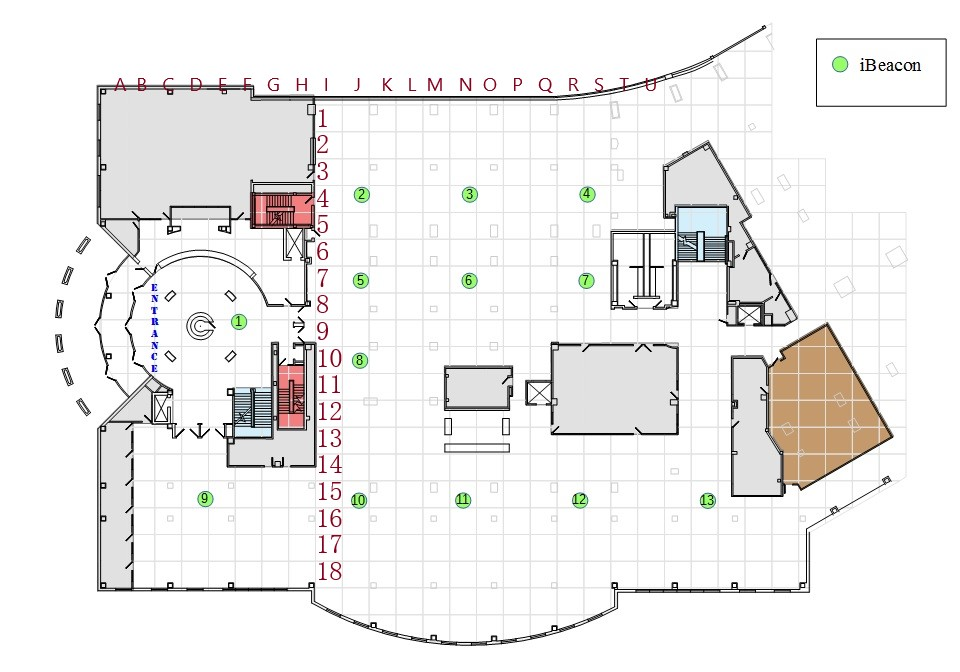

In [81]:
Image(filename = "iBeacon_Layout.jpg")

Now we can apply this to all the other beacons

In [82]:
for i in range(1,14):
    print("===========================")
    beacon_test_row = test_row.copy()
    beacon = 'beacon' + str(i)
    print("Test row for "+beacon)
    beacon_test_row[beacon] = 100
    beacon_test_row = [beacon_test_row]
    print(beacon_test_row)
    predicted = knn_clf.predict(beacon_test_row)
    print(predicted)
    print("===========================")

Test row for beacon1
[beacon1     100.0
beacon2       0.0
beacon3       0.0
beacon4       0.0
beacon5       0.0
beacon6       0.0
beacon7       0.0
beacon8       0.0
beacon9       0.0
beacon10      0.0
beacon11      0.0
beacon12      0.0
beacon13      0.0
Name: 855, dtype: float64]
['F08']
Test row for beacon2
[beacon1       0.0
beacon2     100.0
beacon3       0.0
beacon4       0.0
beacon5       0.0
beacon6       0.0
beacon7       0.0
beacon8       0.0
beacon9       0.0
beacon10      0.0
beacon11      0.0
beacon12      0.0
beacon13      0.0
Name: 855, dtype: float64]
['J05']
Test row for beacon3
[beacon1       0.0
beacon2       0.0
beacon3     100.0
beacon4       0.0
beacon5       0.0
beacon6       0.0
beacon7       0.0
beacon8       0.0
beacon9       0.0
beacon10      0.0
beacon11      0.0
beacon12      0.0
beacon13      0.0
Name: 855, dtype: float64]
['O04']
Test row for beacon4
[beacon1       0.0
beacon2       0.0
beacon3       0.0
beacon4     100.0
beacon5       0.0
beacon6       0

And see that each beacon prediction is within a 2x2 matrix that surrounds that beacon

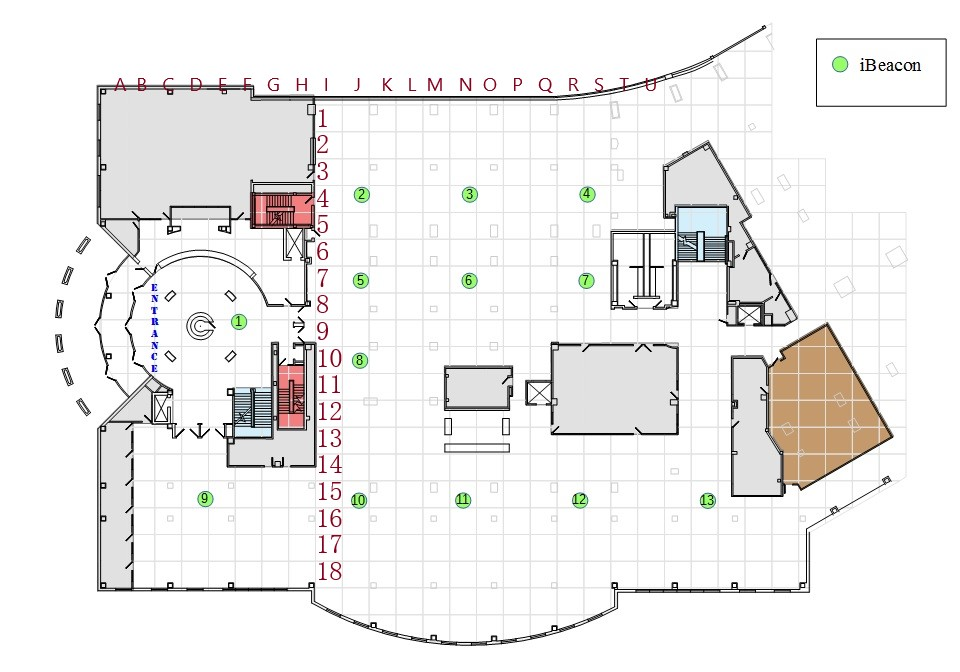

In [83]:
Image(filename = "iBeacon_Layout.jpg")

In [84]:
def gridValidation(model):
    print("Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice")

    beacons = []
    beacon = input("Enter the beacon number: ")
    beacons.append(beacon)

    while(beacon != '-1'):
        beacon = input("Enter the beacon number: ")
        beacons.append(beacon)

    beacons = beacons[:-1]


    print("Inputting the signal strengths")

    signal_strengths = []

    for i in range(len(beacons)):

        signal_strength = input("Enter the signal strength for beacon" + str(beacons[i]) + ": ")
        signal_strengths.append(signal_strength)


    beacon_test_row = test_row.copy()
    for i in range(len(beacons)):    
        beacon = 'beacon' + str(beacons[i])
        beacon_test_row[beacon] = signal_strengths[i]

    beacon_test_row = [beacon_test_row]
    predicted = model.predict(beacon_test_row)
    print(predicted)


In [85]:
gridValidation(knn_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 2
Enter the beacon number: 8
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon2: 75
Enter the signal strength for beacon8: 75
['I07']


Now we will try classification with a Decision Tree, repeating the steps for optimization that we did with the KNN classifier

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.1, random_state = 3)

In [87]:
dt_clf = DecisionTreeClassifier(max_features = 13, random_state = 3)

In [88]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [89]:
fit = dt_clf.fit(X_train, y_train)

In [90]:
y_pre = fit.predict(X_test)

In [92]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       1.00      1.00      1.00         1
         D15       1.00      1.00      1.00         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         1
         I02       0.00      0.00      0.00         0
         I03       0.33      0.50      0.40         2
         I04       0.00      0.00      0.00         1
         I05       0.00      0.00      0.00         2
         I06       0.33      0.50      0.40         2
         I07       0.50      0.50      0.50         2
         I08       0.75      0.60      0.67         5
         I10       0.00      0.00      0.00         0
         J01       0.00      0.00      0.00         2
         J02       0.00      0.00      0.00         1
         J03       0.00      0.00      0.00         3
         J04       0.00      0.00      0.00         6
         J05       1.00    

In [93]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [94]:
data['location'].value_counts()

K04    34
J04    32
J06    29
J07    27
I06    27
       ..
Q06     4
S15     3
L08     3
O01     2
L09     2
Name: location, Length: 105, dtype: int64

In [95]:
# lists for each of the different parameter options, to be used for combinations
criteria = ['gini', 'entropy']
random_states = range(0,10)
min_samples_splits = range(2,34)
max_depths = range(5,50)

# Will probably evaluate to 2 best case anyway, since some label values have only 2 rows, so we can skip this 
#min_samples_leaves = range(2,15)


Putting these lists in nested for loops, we can optimize the classifier with parameter combinations. 
Running this might take a while, so I've commented it out with the results in the cell below

In [97]:
'''
max_accuracy = 0
for criterion in criteria:
    for random_state in random_states:
        for min_samples_split in min_samples_splits:
            for max_depth in max_depths:
                dt_clf = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, max_features = 13, min_samples_split = min_samples_split, random_state = random_state)
                dt_clf.fit(X_train, y_train)
                predicted = dt_clf.predict(X_test)

                if metrics.accuracy_score(y_test, predicted) > max_accuracy:
                    print("================================================")
                    max_accuracy = metrics.accuracy_score(y_test, predicted)
                    print("Max accuracy achieved: "+str(round(max_accuracy, 2)))
                    print("With the following metrics: ")
                    print(" - Criterion: "+str(criterion))
                    print(" - Random state: "+str(random_state))
                    print(" - Min samples split: "+str(min_samples_split))
                    print(" - Max depth: "+str(max_depth))
                    print("================================================")
'''                

'\nmax_accuracy = 0\nfor criterion in criteria:\n    for random_state in random_states:\n        for min_samples_split in min_samples_splits:\n            for max_depth in max_depths:\n                dt_clf = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, max_features = 13, min_samples_split = min_samples_split, random_state = random_state)\n                dt_clf.fit(X_train, y_train)\n                predicted = dt_clf.predict(X_test)\n\n                if metrics.accuracy_score(y_test, predicted) > max_accuracy:\n                    print("================================================")\n                    max_accuracy = metrics.accuracy_score(y_test, predicted)\n                    print("Max accuracy achieved: "+str(round(max_accuracy, 2)))\n                    print("With the following metrics: ")\n                    print(" - Criterion: "+str(criterion))\n                    print(" - Random state: "+str(random_state))\n                    print(" - M

================================================

Max accuracy achieved: 0.1
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 5
 
================================================

================================================

Max accuracy achieved: 0.12
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 6
 
================================================

================================================

Max accuracy achieved: 0.13
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 7
 
================================================

================================================

Max accuracy achieved: 0.14
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 8
 
================================================

================================================

Max accuracy achieved: 0.2
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 9
 
================================================

================================================

Max accuracy achieved: 0.21
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 11
 
================================================

================================================

Max accuracy achieved: 0.22
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 12
 
================================================

================================================

Max accuracy achieved: 0.25
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 13
 
================================================

================================================

Max accuracy achieved: 0.26
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 14
 
================================================

================================================

Max accuracy achieved: 0.3
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 15
 
================================================

================================================

Max accuracy achieved: 0.31
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 16
 
================================================

================================================

Max accuracy achieved: 0.35
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 18
 
================================================

================================================

Max accuracy achieved: 0.37
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 19
 
================================================

================================================

Max accuracy achieved: 0.38
With the following metrics: 
 - Criterion: gini
 - Random state: 0
 - Min samples split: 2
 - Max depth: 20
 
================================================

================================================

Max accuracy achieved: 0.39
With the following metrics: 
 - Criterion: gini
 - Random state: 7
 - Min samples split: 2
 - Max depth: 21
 
================================================

In [100]:
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 21, max_features = 13, min_samples_split = 2, random_state = 7)
dt_clf.fit(X_train, y_train)
y_pre = dt_clf.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       1.00      1.00      1.00         1
         D15       1.00      1.00      1.00         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         1
         I02       0.00      0.00      0.00         0
         I03       0.33      0.50      0.40         2
         I04       0.00      0.00      0.00         1
         I05       0.00      0.00      0.00         2
         I06       0.33      0.50      0.40         2
         I07       1.00      0.50      0.67         2
         I08       0.80      0.80      0.80         5
         I10       0.00      0.00      0.00         0
         J01       0.00      0.00      0.00         2
         J02       0.00      0.00      0.00         1
         J03       0.00      0.00      0.00         3
         J04       0.00      0.00      0.00         6
         J05       1.00    

C:\Users\nishq\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nishq\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [101]:
# Don't want to take too many folds as we don't want to reduce the testing data percentage too much
kf = KFold(n_splits = 15, random_state = 3)

In [102]:
for train_index, test_index in kf.split(X_data):
    
    X_train, X_test = X_data.loc[train_index], X_data.loc[test_index]
    y_train, y_test = y_target.loc[train_index], y_target.loc[test_index]

In [103]:
max_accuracy = 0
for k, (train_index, test_index) in enumerate(kf.split(X_data)):
    
    X_train, X_test = X_data.loc[train_index], X_data.loc[test_index]
    y_train, y_test = y_target.loc[train_index], y_target.loc[test_index]
    
    dt_clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, dt_clf.score(X_test, y_test)))
    
    if dt_clf.score(X_test, y_test) > max_accuracy:
        
        max_accuracy = dt_clf.score(X_test, y_test)
        print("This is the best accuracy")
        best_X_train = X_train.copy()
        best_X_test = X_test.copy()
        best_y_train = y_train.copy()
        best_y_test = y_test.copy()


[fold 0] score: 0.22105
This is the best accuracy
[fold 1] score: 0.29474
This is the best accuracy
[fold 2] score: 0.16842
[fold 3] score: 0.37895
This is the best accuracy
[fold 4] score: 0.45263
This is the best accuracy
[fold 5] score: 0.25263
[fold 6] score: 0.26316
[fold 7] score: 0.08421
[fold 8] score: 0.32632
[fold 9] score: 0.62105
This is the best accuracy
[fold 10] score: 0.26596
[fold 11] score: 0.20213
[fold 12] score: 0.24468
[fold 13] score: 0.19149
[fold 14] score: 0.09574


In [104]:
fit = dt_clf.fit(best_X_train, best_y_train)

In [105]:
y_pre = fit.predict(best_X_test)

In [106]:
print(classification_report(best_y_test,y_pre))

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D15       0.80      1.00      0.89         4
         E15       0.00      0.00      0.00         2
         F08       1.00      1.00      1.00         2
         G15       0.00      0.00      0.00         2
         I01       0.00      0.00      0.00         0
         I03       0.00      0.00      0.00         0
         I04       1.00      0.50      0.67         2
         I06       0.60      0.50      0.55         6
         I07       0.56      0.62      0.59         8
         I08       0.50      0.33      0.40         3
         I10       0.50      1.00      0.67         4
         J02       0.00      0.00      0.00         2
         J03       0.00      0.00      0.00         0
         J04       1.00      0.25      0.40         4
         J06       0.60      0.38      0.46         8
         J07       0.50      1.00      0.67         4
         J08       0.00    

C:\Users\nishq\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nishq\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [107]:
for i in range(1,14):
    print("===========================")
    beacon_test_row = test_row.copy()
    beacon = 'beacon' + str(i)
    print("Test row for "+beacon)
    beacon_test_row[beacon] = 100
    beacon_test_row = [beacon_test_row]
    print(beacon_test_row)
    predicted = dt_clf.predict(beacon_test_row)
    print(predicted)
    print("===========================")

Test row for beacon1
[beacon1     100.0
beacon2       0.0
beacon3       0.0
beacon4       0.0
beacon5       0.0
beacon6       0.0
beacon7       0.0
beacon8       0.0
beacon9       0.0
beacon10      0.0
beacon11      0.0
beacon12      0.0
beacon13      0.0
Name: 855, dtype: float64]
['F08']
Test row for beacon2
[beacon1       0.0
beacon2     100.0
beacon3       0.0
beacon4       0.0
beacon5       0.0
beacon6       0.0
beacon7       0.0
beacon8       0.0
beacon9       0.0
beacon10      0.0
beacon11      0.0
beacon12      0.0
beacon13      0.0
Name: 855, dtype: float64]
['J05']
Test row for beacon3
[beacon1       0.0
beacon2       0.0
beacon3     100.0
beacon4       0.0
beacon5       0.0
beacon6       0.0
beacon7       0.0
beacon8       0.0
beacon9       0.0
beacon10      0.0
beacon11      0.0
beacon12      0.0
beacon13      0.0
Name: 855, dtype: float64]
['M03']
Test row for beacon4
[beacon1       0.0
beacon2       0.0
beacon3       0.0
beacon4     100.0
beacon5       0.0
beacon6       0

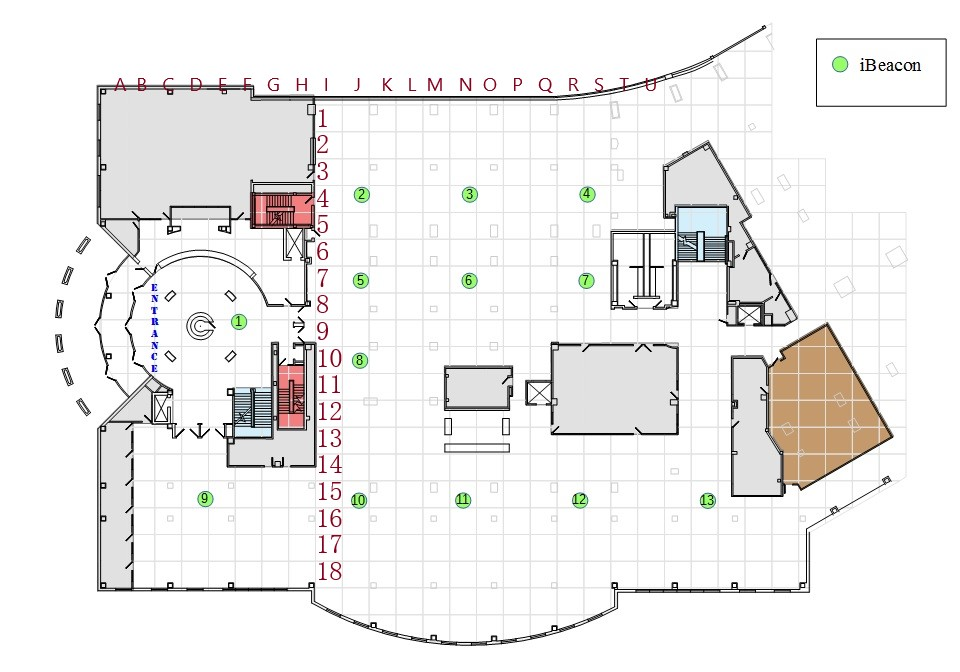

In [108]:
Image(filename = "iBeacon_Layout.jpg")

In [109]:
gridValidation(dt_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 2
Enter the beacon number: 8
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon2: 75
Enter the signal strength for beacon8: 75
['J08']


In [110]:
feature_names = data[['beacon1', 'beacon2','beacon3','beacon4','beacon5','beacon6','beacon7','beacon8','beacon9','beacon10','beacon11','beacon12','beacon13']].columns

In [111]:
with open('beacon.dot', 'w') as f:
    f = tree.export_graphviz(dt_clf, out_file=f, feature_names = feature_names,
                            class_names = data['location'].unique(), filled=True, 
                            rounded = True,
                            special_characters=True)

In [112]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
                       max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [113]:
# Graphing out the decision tree, this may only work if GRaphViz is in your PATH variables
# https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

dot_data = StringIO()
tree.export_graphviz(dt_clf, out_file=dot_data, feature_names = feature_names, class_names = data['location'].unique(), filled=True, rounded = True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Double click to view the graph fully

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.576914 to fit



In [113]:
# K-Folds can overfit - limitation
# 2 - 6, 75 - 100
# 2 - 6, 75 - 75 bad
#6 - 8 good
#2 - 8 good

In [114]:
gridValidation(knn_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 2
Enter the beacon number: 6
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon2: 75
Enter the signal strength for beacon6: 75
['K05']


In [115]:
gridValidation(dt_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 2
Enter the beacon number: 6
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon2: 75
Enter the signal strength for beacon6: 75
['J08']


In [117]:
gridValidation(knn_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 2
Enter the beacon number: 3
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon2: 75
Enter the signal strength for beacon3: 75
['P04']


In [118]:
gridValidation(dt_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 2
Enter the beacon number: 3
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon2: 75
Enter the signal strength for beacon3: 75
['L04']


In [119]:
gridValidation(knn_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 6
Enter the beacon number: 8
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon6: 100
Enter the signal strength for beacon8: 25
['N06']


In [120]:
gridValidation(dt_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 6
Enter the beacon number: 8
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon6: 100
Enter the signal strength for beacon8: 25
['N06']


In [121]:
gridValidation(knn_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 6
Enter the beacon number: 8
Enter the beacon number: 7
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon6: 50
Enter the signal strength for beacon8: 50
Enter the signal strength for beacon7: 50
['L08']


In [122]:
gridValidation(dt_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 6
Enter the beacon number: 8
Enter the beacon number: 7
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon6: 50
Enter the signal strength for beacon8: 50
Enter the signal strength for beacon7: 50
['R06']


In [123]:
gridValidation(knn_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 11
Enter the beacon number: 12
Enter the beacon number: 10
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon11: 85
Enter the signal strength for beacon12: 65
Enter the signal strength for beacon10: 25
['L15']


In [124]:
gridValidation(dt_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 11
Enter the beacon number: 12
Enter the beacon number: 10
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon11: 85
Enter the signal strength for beacon12: 65
Enter the signal strength for beacon10: 25
['L15']


In [125]:
gridValidation(knn_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 8
Enter the beacon number: 2
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon8: 75
Enter the signal strength for beacon2: 75
['I07']


In [126]:
gridValidation(dt_clf)

Inputting the beacon numbers, input -1 to stop, and don't put the same beacon twice
Enter the beacon number: 8
Enter the beacon number: 2
Enter the beacon number: -1
Inputting the signal strengths
Enter the signal strength for beacon8: 75
Enter the signal strength for beacon2: 75
['J08']
